# Linear Regreassion From Scratch and models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore')

data = '/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv'
df=pd.read_csv(data)


# Visulization

In [2]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
for col in df.columns:
    print(f'{col}: {df[col].nunique()} unique values')


Hours Studied: 9 unique values
Previous Scores: 60 unique values
Extracurricular Activities: 2 unique values
Sleep Hours: 6 unique values
Sample Question Papers Practiced: 10 unique values
Performance Index: 91 unique values


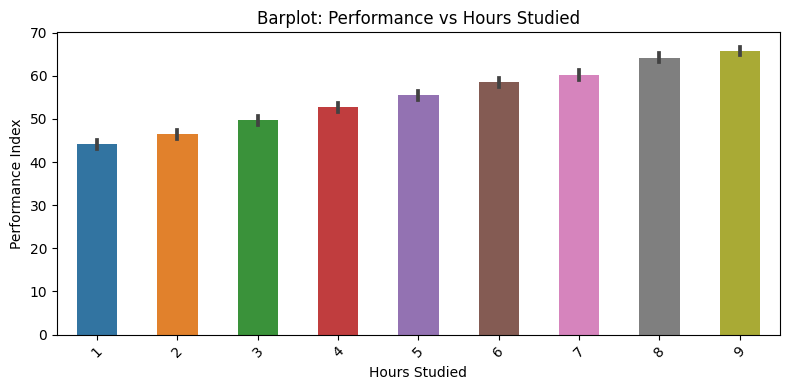

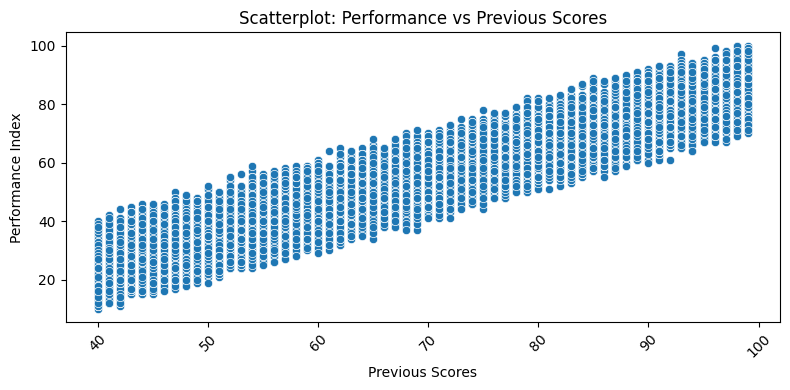

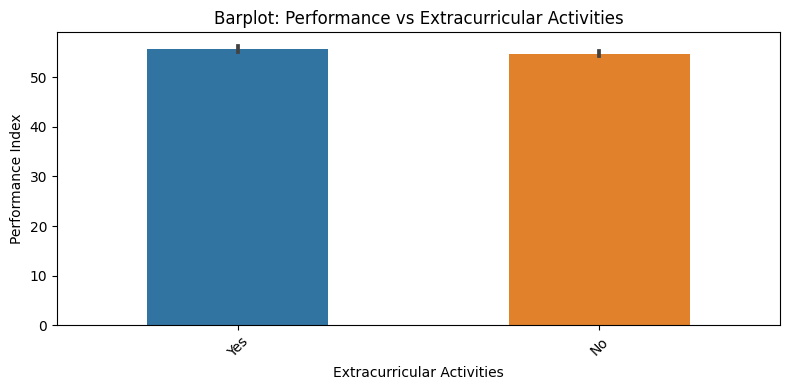

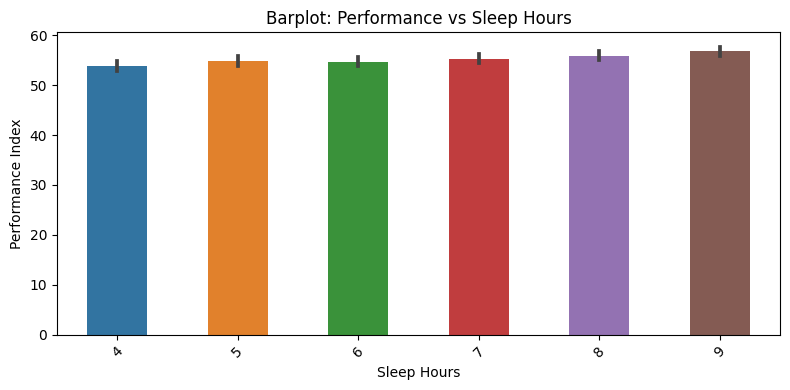

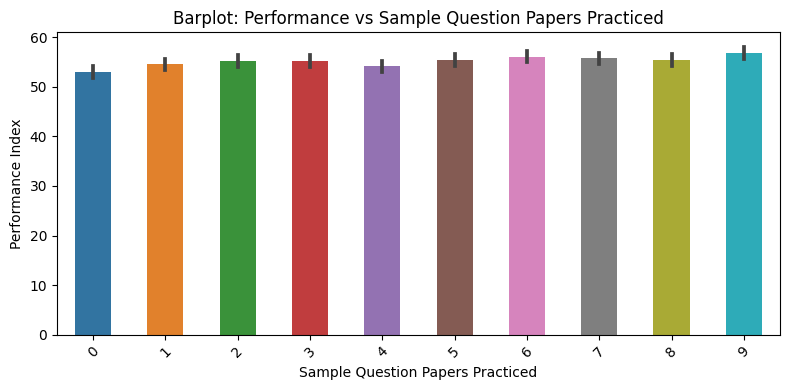

In [6]:

target = 'Performance Index'
Uniqness = 10  

for col in df.columns:
    if col != target:
        unique_vals = df[col].nunique()
        plt.figure(figsize=(8, 4))
        
        if unique_vals <= Uniqness:
            sns.barplot(x=df[col], y=df[target], width=0.5)
            plt.title(f'Barplot: Performance vs {col}')
        else:
            sns.scatterplot(x=df[col], y=df[target])
            plt.title(f'Scatterplot: Performance vs {col}')
        
        plt.xlabel(col)
        plt.ylabel('Performance Index')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

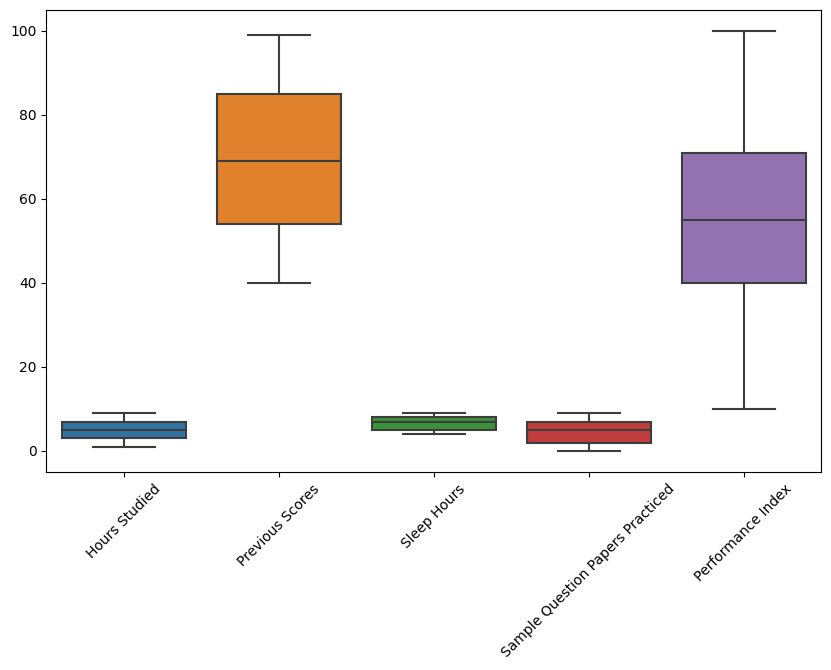

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)

plt.xticks(rotation=45)
plt.show()

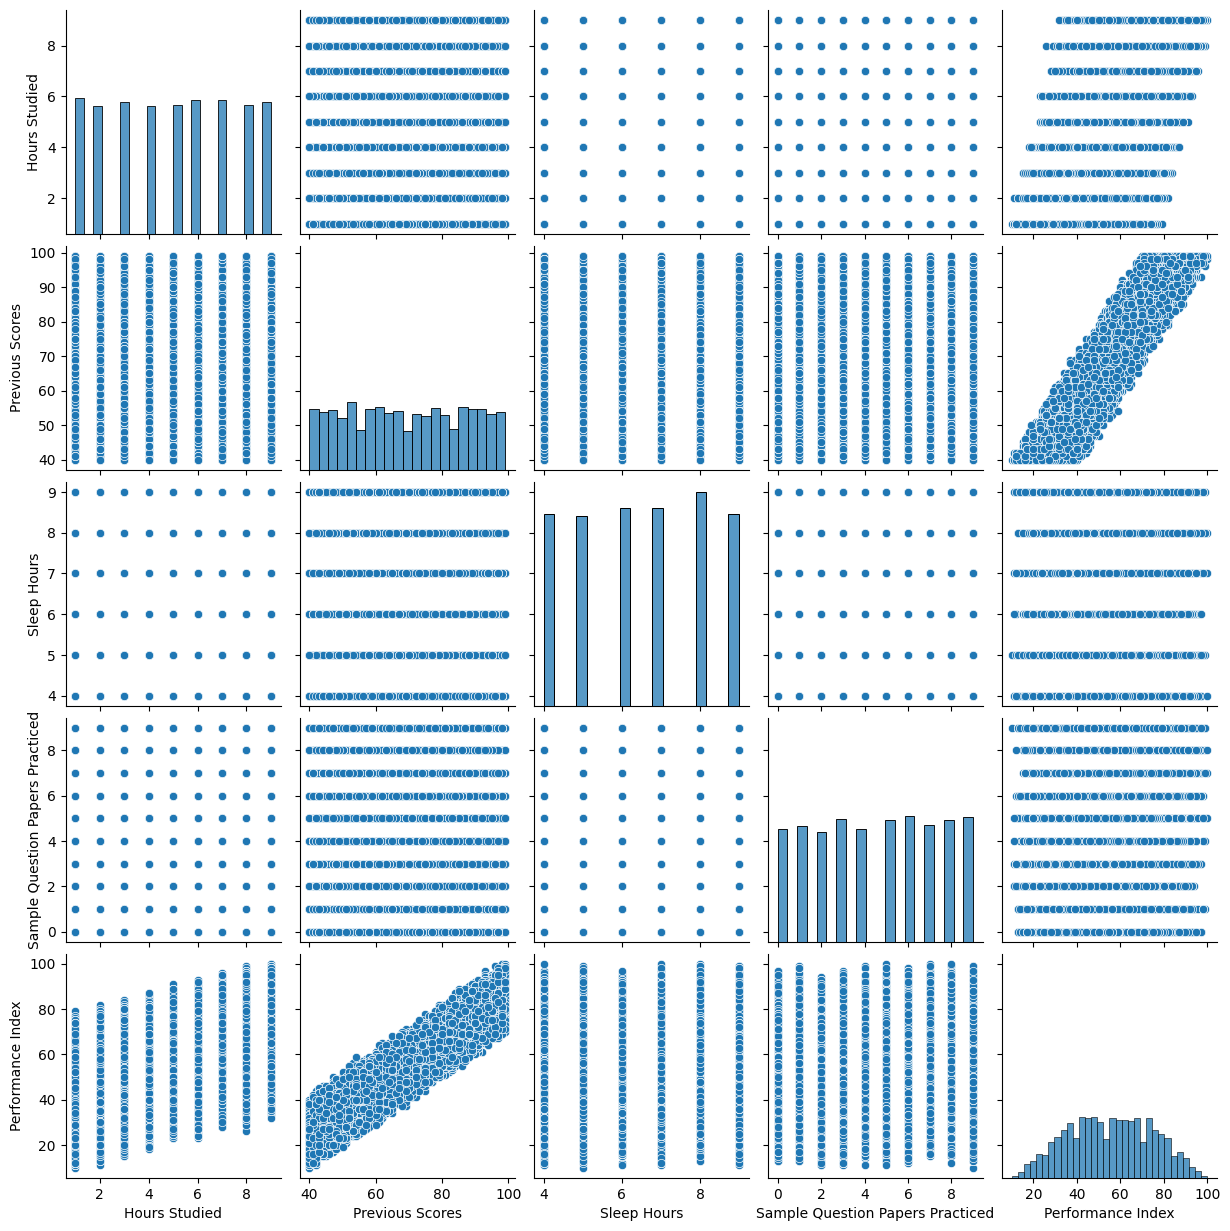

In [8]:
sns.pairplot(df)
plt.show()

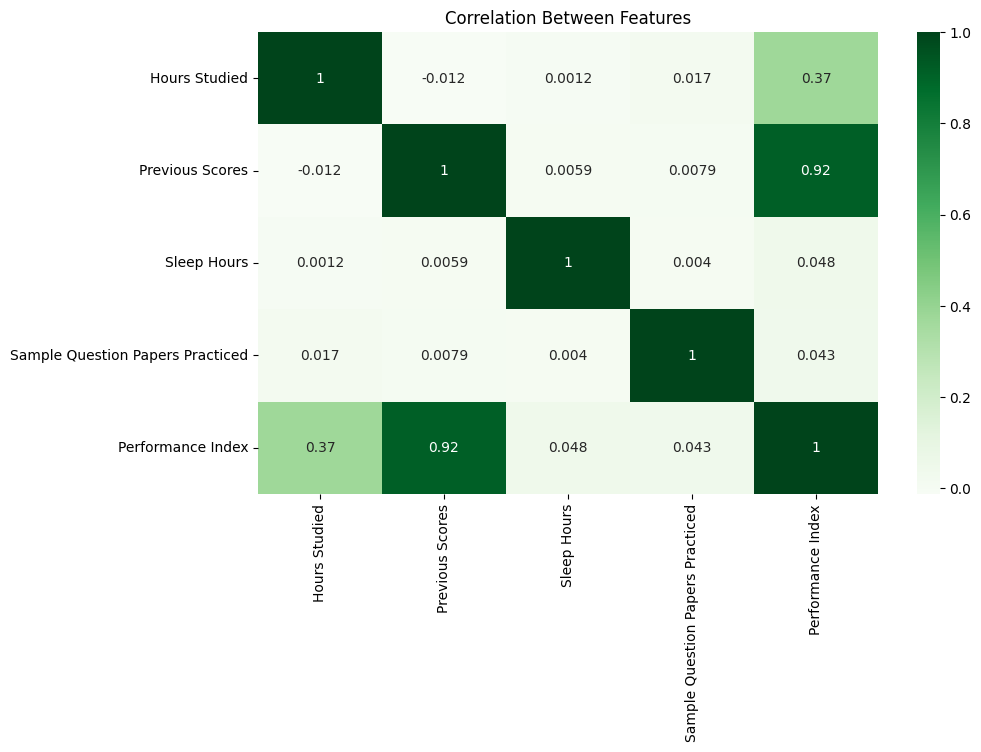

In [9]:
plt.figure(figsize=(10, 6))
correlation=df.corr(numeric_only=True)
sns.heatmap(correlation,annot=True,cmap='Greens')
plt.title('Correlation Between Features')
plt.show()

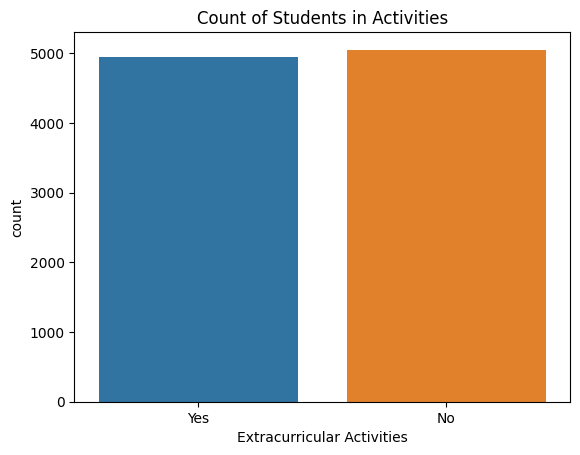

In [10]:
sns.countplot(x='Extracurricular Activities', data=df)
plt.title('Count of Students in Activities')
plt.show()


# Preprocessing

In [11]:
df.head()   


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [12]:
df.info()   


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [13]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [14]:
print (f'Number of nulls: {df.isnull().sum().sum()}')

Number of nulls: 0


In [15]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})


In [16]:
X = df.drop(columns=["Performance Index"]).values
y = df["Performance Index"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)



# Models from scratch


🔹 Training Batch GD:
Epoch 0: Batch Loss = 79.402
Epoch 100: Batch Loss = 64.929
Epoch 200: Batch Loss = 58.772
Epoch 300: Batch Loss = 53.967
Epoch 400: Batch Loss = 50.195
Epoch 500: Batch Loss = 47.217
Epoch 600: Batch Loss = 44.853
Epoch 700: Batch Loss = 42.967
Epoch 800: Batch Loss = 41.455
Epoch 900: Batch Loss = 40.237

🔹 Training SGD:
Epoch 0: SGD Loss = 34.761
Epoch 10: SGD Loss = 34.468
Epoch 20: SGD Loss = 34.470
Epoch 30: SGD Loss = 34.471
Epoch 40: SGD Loss = 34.471
Epoch 50: SGD Loss = 34.471
Epoch 60: SGD Loss = 34.471
Epoch 70: SGD Loss = 34.471
Epoch 80: SGD Loss = 34.471
Epoch 90: SGD Loss = 34.471

🔹 Training Ridge GD:
Epoch 0: Ridge Loss = 2768.0485
Epoch 100: Ridge Loss = 72.0571
Epoch 200: Ridge Loss = 71.1894
Epoch 300: Ridge Loss = 70.3440
Epoch 400: Ridge Loss = 69.5200
Epoch 500: Ridge Loss = 68.7170
Epoch 600: Ridge Loss = 67.9344
Epoch 700: Ridge Loss = 67.1715
Epoch 800: Ridge Loss = 66.4279
Epoch 900: Ridge Loss = 65.7031

🔹 Final Result:
 - Batch GD: Lo

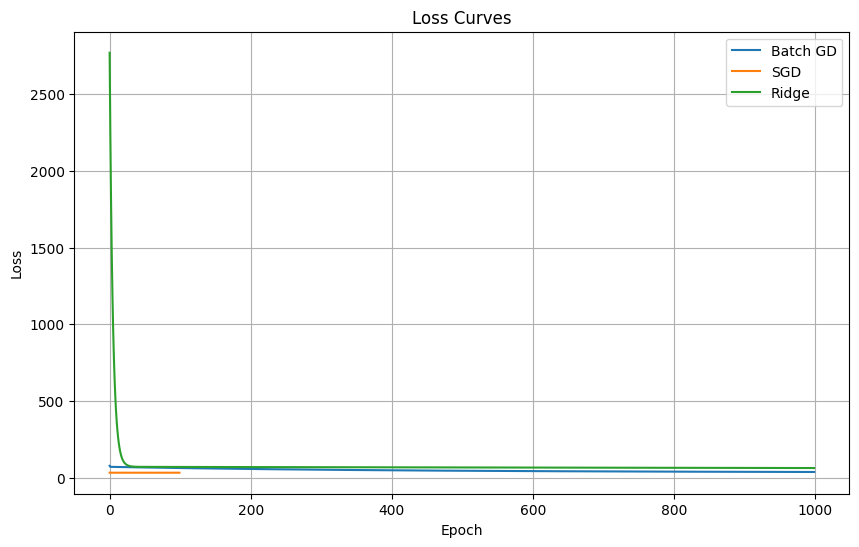

In [17]:
X = np.c_[np.ones((X.shape[0], 1)), X]

def compute_loss(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    return (1 / m) * np.sum((predictions - y) ** 2)

def compute_loss_ridge(X, y, theta, alpha):
    m = len(y)
    predictions = X.dot(theta)
    return (1 / m) * np.sum((predictions - y) ** 2) + alpha * np.sum(theta[1:] ** 2)

# Batch Gradient Descent
def gradient_descent(X, y, lr=0.0001, epochs=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    loss_history = []

    for i in range(epochs):
        predictions = X.dot(theta)
        gradients = (2 / m) * X.T.dot(predictions - y)
        theta -= lr * gradients
        loss = compute_loss(X, y, theta)
        loss_history.append(loss)
        if i % 100 == 0:
            print(f"Epoch {i}: Batch Loss = {loss:.3f}")
    return theta, loss_history

# ✅ Ridge Gradient Descent (معدلة)
def gradient_descent_ridge(X, y, alpha=0.01, lr=1e-4, epochs=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    loss_history = []

    for i in range(epochs):
        predictions = X.dot(theta)
        gradients = (2 / m) * (X.T.dot(predictions - y) + alpha * np.vstack([[0], theta[1:]]))
        theta -= lr * gradients
        loss = compute_loss_ridge(X, y, theta, alpha)

        # Check for NaNs or infs
        if np.isnan(loss) or np.isinf(loss) or np.isnan(theta).any() or np.isinf(theta).any():
            print(f"Stopped at Epoch {i}: Loss or theta became NaN/Inf")
            break

        loss_history.append(loss)
        if i % 100 == 0:
            print(f"Epoch {i}: Ridge Loss = {loss:.4f}")
    return theta, loss_history

# SGD
def stochastic_gradient_descent(X, y, lr=0.0001, epochs=100):
    m, n = X.shape
    theta = np.zeros((n, 1))
    loss_history = []

    for epoch in range(epochs):
        for i in range(m):
            xi = X[i:i+1]
            yi = y[i:i+1]
            prediction = xi.dot(theta)
            gradient = 2 * xi.T.dot(prediction - yi)
            theta -= lr * gradient
        loss = compute_loss(X, y, theta)
        loss_history.append(loss)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: SGD Loss = {loss:.3f}")
    return theta, loss_history

print("\n🔹 Training Batch GD:")
theta_batch, loss_batch = gradient_descent(X_train, y_train)

print("\n🔹 Training SGD:")
theta_sgd, loss_sgd = stochastic_gradient_descent(X_train, y_train)

print("\n🔹 Training Ridge GD:")
theta_ridge, loss_ridge = gradient_descent_ridge(X_train, y_train, alpha=0.001, lr=1e-5)

y_pred_batch = X_test.dot(theta_batch)
y_pred_sgd = X_test.dot(theta_sgd)
y_pred_ridge = X_test.dot(theta_ridge)

loss_test_batch = compute_loss(X_test, y_test, theta_batch)
loss_test_sgd = compute_loss(X_test, y_test, theta_sgd)
loss_test_ridge = compute_loss_ridge(X_test, y_test, theta_ridge, alpha=0.001)

r2_batch = r2_score(y_test, y_pred_batch)
r2_sgd = r2_score(y_test, y_pred_sgd)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\n🔹 Final Result:")
print(f" - Batch GD: Loss = {loss_test_batch:.4f}, R² = {r2_batch:.4f}")
print(f" - SGD:      Loss = {loss_test_sgd:.4f}, R² = {r2_sgd:.4f}")
print(f" - Ridge:    Loss = {loss_test_ridge:.4f}, R² = {r2_ridge:.4f}")

plt.figure(figsize=(10,6))
plt.plot(loss_batch, label="Batch GD")
plt.plot(loss_sgd, label="SGD")
plt.plot(loss_ridge, label="Ridge")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves")
plt.legend()
plt.grid(True)
plt.show()


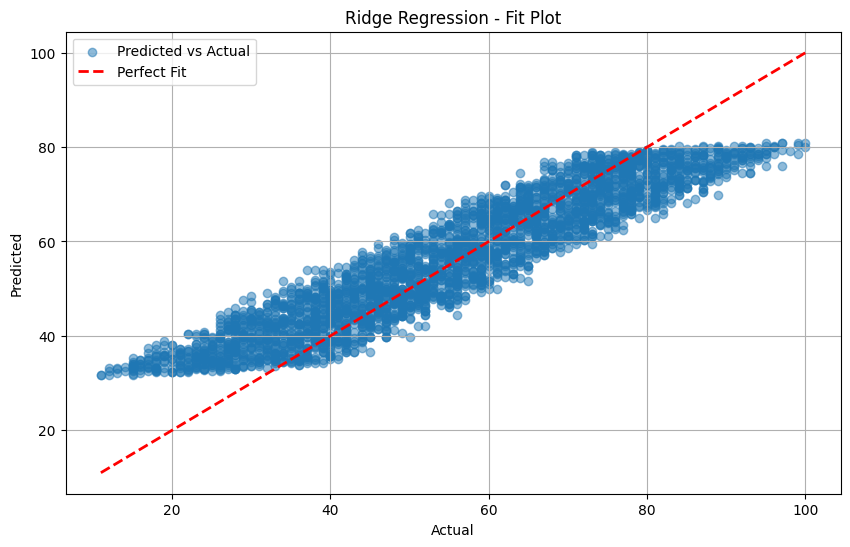

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Ridge Regression - Fit Plot")
plt.legend()
plt.grid(True)
plt.show()


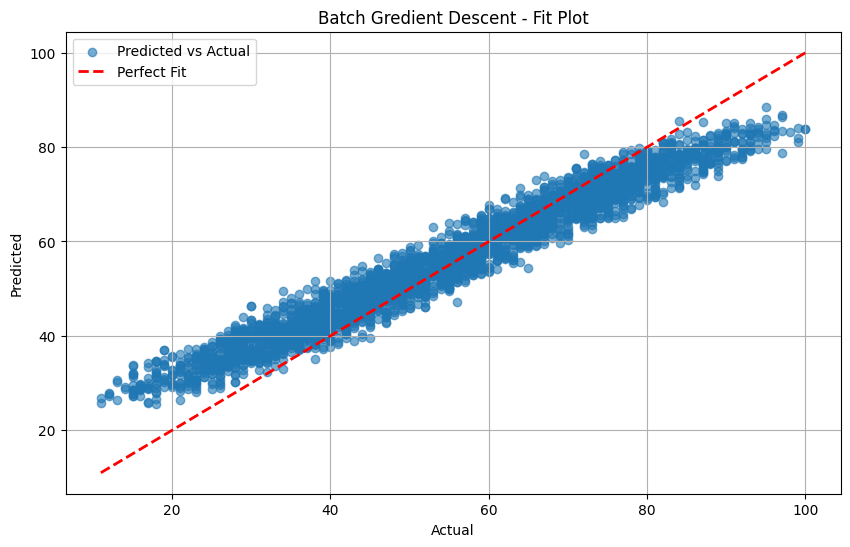

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_batch , alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Batch Gredient Descent - Fit Plot")
plt.legend()
plt.grid(True)
plt.show()


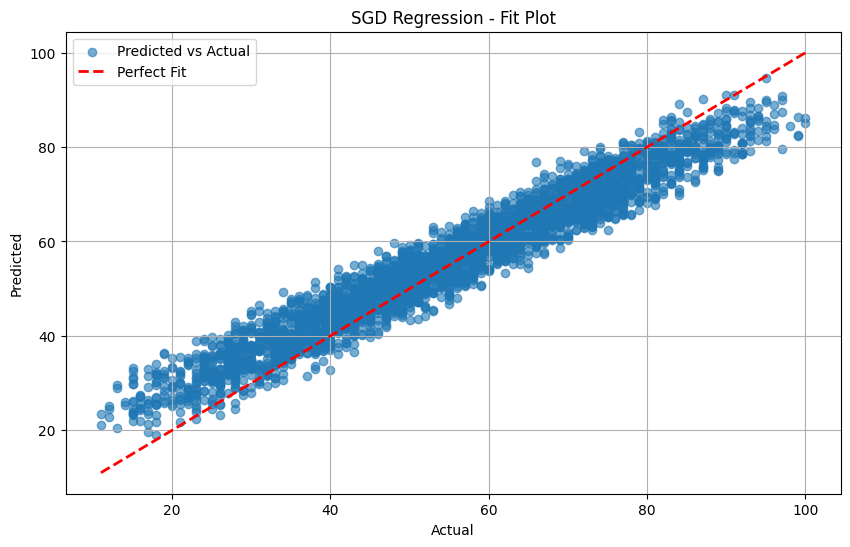

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_sgd , alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("SGD Regression - Fit Plot")
plt.legend()
plt.grid(True)
plt.show()


# Sklearn models

In [21]:
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred_lin = lin_reg.predict(X_test)
r2 = r2_score(y_test, y_pred_lin)
loss_lin = mean_squared_error(y_test, y_pred_lin)
r2_linear = r2_score(y_test, y_pred_lin)

Ridge = Ridge(alpha=0.001)
Ridge.fit(X_train,y_train)
y_pred_ridge = Ridge.predict(X_test)
loss_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

Sgd_reg = SGDRegressor(max_iter=1000, eta0=0.0001, learning_rate='constant', penalty=None)
Sgd_reg.fit(X_train,y_train)
y_pred_sgd = Sgd_reg.predict(X_test)
loss_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print("\n🔹 Final Result with sklearn models:")
print(f" - LinearRegression: Loss = {loss_lin:.4f}, R² = {r2_linear:.4f}")
print(f" - Ridge:            Loss = {loss_ridge:.4f}, R² = {r2_ridge:.4f}")
print(f" - SGDRegressor:     Loss = {loss_sgd:.4f}, R² = {r2_sgd:.4f}")



🔹 Final Result with sklearn models:
 - LinearRegression: Loss = 4.2698, R² = 0.9884
 - Ridge:            Loss = 4.2698, R² = 0.9884
 - SGDRegressor:     Loss = 9.9951, R² = 0.9728
